In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv')
df.head(5)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [64]:
Q3 = df['placement_exam_marks'].quantile(0.75)
Q1 = df['placement_exam_marks'].quantile(0.25)
IQR = np.abs(Q3 - Q1)
max = Q3 + 1.5*IQR
min = Q1 - 1.5*IQR

In [69]:
new_df= df.copy()
new_df['placement_exam_marks'] = np.where(new_df['placement_exam_marks'] > max,
        max,
        np.where(new_df['placement_exam_marks'] < min,
                min,
                new_df['placement_exam_marks']))

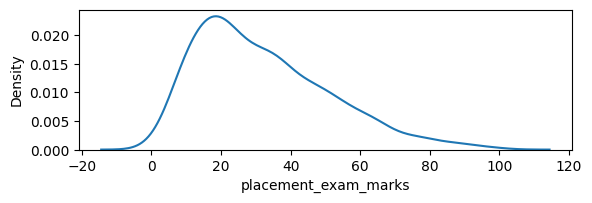

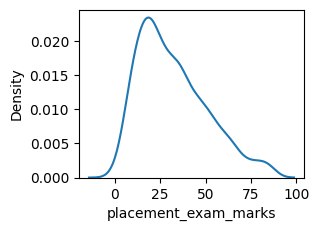

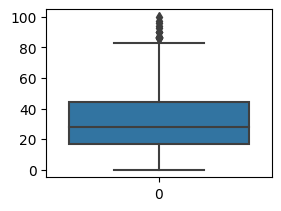

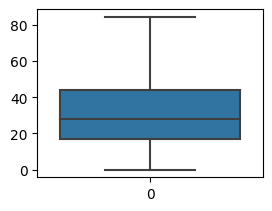

In [72]:
plt.figure(figsize=(14,4))

plt.subplot(221)
sns.kdeplot(df['placement_exam_marks'] , label = 'before')
plt.show()

plt.subplot(222)
sns.kdeplot(new_df['placement_exam_marks'] , label = 'after')
plt.show()

plt.subplot(223)
sns.boxplot(df['placement_exam_marks'])
plt.show()

plt.subplot(224)
sns.boxplot(new_df['placement_exam_marks'])
plt.show()